In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib

from matplotlib import pylab as plt


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [2]:
df = pd.read_csv('loans_full_schema.csv')
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


Following is some EDA that I performed

In [3]:
df.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

In [4]:
df.shape

(10000, 55)

In [5]:
df.shape[0] # number of rows

10000

In [6]:
df.shape[1] # number of cols

55

In [7]:
df.describe() # Summary statistics of the dataset like mean, min, max, etc

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [8]:
df.info() #info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [9]:
df.nunique() #number of unique values per column

emp_title                           4741
emp_length                            11
state                                 50
homeownership                          3
annual_income                       1463
verified_income                        3
debt_to_income                      3673
annual_income_joint                  596
verification_income_joint              3
debt_to_income_joint                1189
delinq_2y                             12
months_since_last_delinq              97
earliest_credit_line                  53
inquiries_last_12m                    26
total_credit_lines                    78
open_credit_lines                     45
total_credit_limit                  9119
total_credit_utilized               9497
num_collections_last_12m               4
num_historical_failed_to_pay           9
months_since_90d_late                106
current_accounts_delinq                2
total_collection_amount_ever         896
current_installment_accounts          30
accounts_opened_

In [10]:
df.isnull().sum() #total null values per column 

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

What I observed in this dataset is that it involves missing values and they hold NaN value. Some of the columns have majority NaN values and hence we can conclude that they are not helpful during model training. This is why I did not choose them later.  

In [11]:
df=df.dropna()

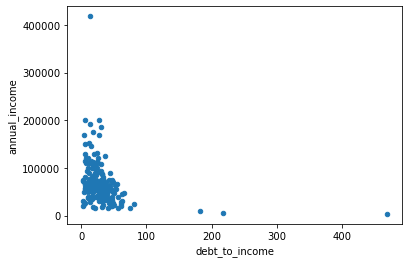

In [12]:
df.plot.scatter('debt_to_income','annual_income') # alpha=0.1,s=10
plt.show()

This is a scatter plot which shows the relation between debt_to_income and annual_income. There is no defined pattern as such. We observe that there are more datapoints for debt_to_income for lower annual_income.

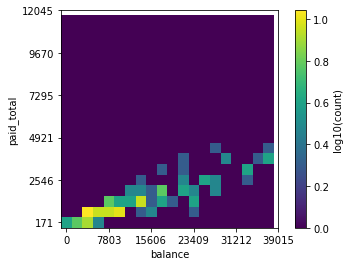

In [13]:
nbins = 20

heatmap, xedges, yedges = np.histogram2d(df['balance'], df['paid_total'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('balance')
plt.ylabel('paid_total')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

This is a heatmap which plots paid_total against balance.

verified_income  Not Verified  Source Verified  Verified
homeownership                                           
MORTGAGE             0.213740         0.473282  0.312977
OWN                  0.157895         0.578947  0.263158
RENT                 0.196078         0.470588  0.333333


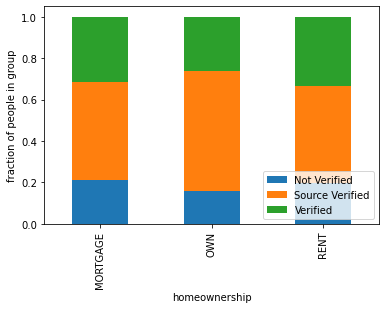

In [14]:
count_matrix = df.groupby(['homeownership', 'verified_income']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

This is stacked bar plot which plots the different categories of homeownership and verified_income. 

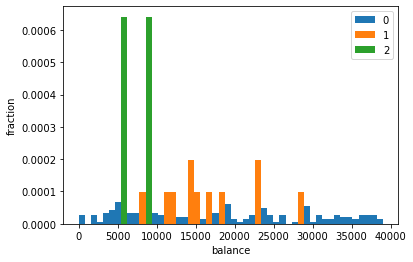

In [15]:
categories = df['public_record_bankrupt'].unique()
bin_range = (df['balance'].min(),df['balance'].max())

for c in categories:
    plt.hist(df[df['public_record_bankrupt']==c]['balance'],label=c,range=bin_range,bins=50,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('balance')
plt.show()

This is a category-specific histograms which shows the relation between public_record_bankrupt which is a categorical variable and balance which is a continuous variable.

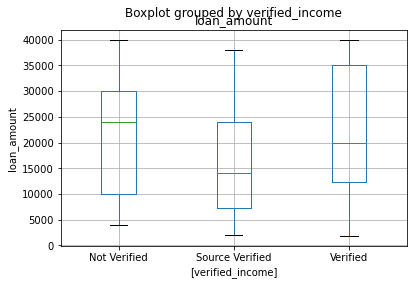

In [16]:
df[['loan_amount','verified_income']].boxplot(by='verified_income')
plt.ylabel('loan_amount')
plt.show()

This is a boxplot which shows the relation between loan_amount and verified_income. 

In [17]:
y = df['interest_rate'] # target variable
X = df[['debt_to_income','paid_late_fees','paid_interest','paid_principal','paid_total','balance','disbursement_method','initial_listing_status','loan_status','installment','interest_rate','loan_amount','public_record_bankrupt','tax_liens','account_never_delinq_percent','num_mort_accounts','num_cc_carrying_balance','num_open_cc_accounts','num_total_cc_accounts','total_debit_limit','num_active_debit_accounts','num_accounts_30d_past_due','num_satisfactory_accounts','accounts_opened_24m','current_installment_accounts','num_historical_failed_to_pay','num_collections_last_12m','total_credit_utilized','total_credit_limit','open_credit_lines','total_credit_lines','inquiries_last_12m','earliest_credit_line','delinq_2y','verified_income','annual_income','homeownership']] # all other columns are features


In [18]:
# collect which encoder to use on each feature
# needs to be done manually
cat_ftrs = ['disbursement_method','initial_listing_status','public_record_bankrupt','tax_liens','num_accounts_30d_past_due','verified_income','homeownership']
cont_ftrs = ['debt_to_income','paid_late_fees','paid_interest','paid_principal','paid_total','balance','loan_amount','account_never_delinq_percent','num_mort_accounts','num_cc_carrying_balance','num_open_cc_accounts','num_total_cc_accounts','total_debit_limit','num_active_debit_accounts','num_satisfactory_accounts','accounts_opened_24m','current_installment_accounts','num_historical_failed_to_pay','num_collections_last_12m','total_credit_utilized','total_credit_limit','open_credit_lines','total_credit_lines','inquiries_last_12m','earliest_credit_line','delinq_2y','annual_income']

# collect all the encoders
preprocessor = ColumnTransformer(transformers=[
            ('minmax', MinMaxScaler(), cont_ftrs),
            ('ord', OrdinalEncoder(), cat_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here
Xprep = clf.fit_transform(X)
Xprep.shape

(201, 34)

Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=100)
model.fit(Xprep, y)

RandomForestRegressor(max_depth=5, max_leaf_nodes=5)

In [20]:
print("Regression coefficient (R2):",model.score(Xprep,y))

Regression coefficient (R2): 0.6767052087291796


Decision Tree Regressor

In [21]:
from sklearn import tree
tree_model = tree.DecisionTreeRegressor(max_depth=5,random_state=None)
tree_model.fit(Xprep,y)

DecisionTreeRegressor(max_depth=5)

In [22]:
print("Regression coefficient (R2):",tree_model.score(Xprep,y))

Regression coefficient (R2): 0.8371680381063895
